In [10]:
import os

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [11]:
# Create a data frame from the college scorecard cohorts-institutions CSV file.

institutions_filename = './data/Most-Recent-Cohorts-Institution.csv.gz'
institutions_df = pd.read_csv(institutions_filename,
                usecols=['OPEID6', 
                         'INSTNM', 'CITY', 'STABBR', 
                         'FTFTPCTPELL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'ADM_RATE', 
                         'NPT4_PUB', 'NPT4_PRIV',
                         'NPT41_PUB', 'NPT41_PRIV',
                         'NPT45_PUB', 'NPT45_PRIV', 
                         'MD_EARN_WNE_P10', 'C100_4'])

In [12]:
institutions_df.head()

,OPEID6,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060,16530.0,NaN,13443.0,19717.0,NaN,NaN,8568.0,20400.0,46990.0,0.3816,0.3563
2,25034,Amridge University,Montgomery,AL,NaN,NaN,17618.0,NaN,NaN,17385.0,NaN,6950.0,6950.0,37895.0,0.2500,0.6667
3,1055,University of Alabama in Huntsville,Huntsville,AL,0.7711,17208.0,NaN,13631.0,19862.0,NaN,NaN,11338.0,23734.0,54361.0,0.3109,0.2304
4,1005,Alabama State University,Montgomery,AL,0.9888,19534.0,NaN,19581.0,17559.0,NaN,NaN,11068.0,19396.0,32084.0,0.1462,0.7590


In [14]:
# Load the CSV file for fields of study into another data frame

fields_filename = './data/FieldOfStudyData1718_1819_PP.csv.gz'

fields_of_study_df = pd.read_csv(fields_filename,
                                usecols=['OPEID6', 'INSTNM', 'CREDDESC', 'CIPDESC', 'CONTROL'])

In [15]:
fields_of_study_df.head()

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


In [16]:
# What state has the greatest number of universities in this database?

(
    institutions_df
    .groupby('STABBR')['OPEID6'].count()
    .sort_values(ascending=False)
    .head(1)
)

STABBR
CA    705
Name: OPEID6, dtype: int64

In [17]:
# What city+state has the greatest number of universities in this database?

(
    institutions_df
    .groupby(['STABBR', 'CITY'])['OPEID6'].count()
    .sort_values(ascending=False)
    .head(1)
)
# What is the most popular major?




STABBR  CITY    
NY      New York    81
Name: OPEID6, dtype: int64

In [18]:
# How much memory can we save if we set the CITY and STABBR columns in institutions_df to be categories?
pre_category_memory = (
    institutions_df
    .memory_usage(deep=True)
    .sum()
)

print(f'{pre_category_memory:,}')

2,105,663


In [19]:
institutions_df['CITY'] = (
    institutions_df['CITY']
    .astype('category')
)

institutions_df['STABBR'] = (
    institutions_df['STABBR']
    .astype('category')
)

post_category_memory = (
    institutions_df
    .memory_usage(deep=True)
    .sum()
)

savings = pre_category_memory - post_category_memory
print(f'{savings:,}')

579,371


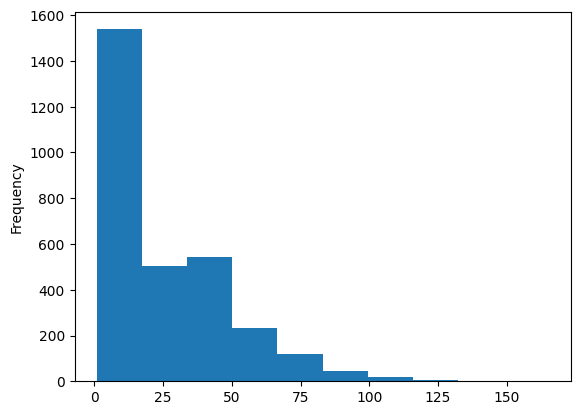

In [20]:
# Create a histogram showing how many bachelor programs universities offer
p = (
    fields_of_study_df
    .loc[fields_of_study_df['CREDDESC'] == 'Bachelors Degree']
    .groupby('INSTNM')['CIPDESC'].count()
    .plot.hist()
)

f = p.get_figure()
f.savefig('/tmp/CH12_F1_LERNER.jpg')

In [21]:
# Which university offers the greatest number of bachelor programs?
(
    fields_of_study_df
    .loc[fields_of_study_df['CREDDESC'] == 'Bachelors Degree']
    .groupby('INSTNM')['CIPDESC'].count()
    .sort_values(ascending=False)
    .head(10)
)

INSTNM
Westminster College                          165
Pennsylvania State University-Main Campus    141
University of Washington-Seattle Campus      137
Ohio State University-Main Campus            126
Bethel University                            125
University of Minnesota-Twin Cities          116
Arizona State University Campus Immersion    116
University of Arizona                        116
Anderson University                          114
Purdue University-Main Campus                114
Name: CIPDESC, dtype: int64